<a href="https://colab.research.google.com/github/DealerDEAL/control_ds/blob/main/control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import precision_score
from scipy.spatial.distance import cdist
import time

df = pd.read_csv('/content/Mall_Customers_Segmentation.csv')


df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
datatypes = df.dtypes
print(datatypes)

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [22]:
le = LabelEncoder()
le.fit(df.Genre)
df['Genre'] = le.transform(df.Genre)

df.head()

#df = pd.isnull(df).any
print(df)

     CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1      1   19                  15                      39
1             2      1   21                  15                      81
2             3      0   20                  16                       6
3             4      0   23                  16                      77
4             5      0   31                  17                      40
..          ...    ...  ...                 ...                     ...
195         196      0   35                 120                      79
196         197      0   45                 126                      28
197         198      1   32                 126                      74
198         199      1   32                 137                      18
199         200      1   30                 137                      83

[200 rows x 5 columns]


In [25]:
df.isnull().any().any()

False

array([[<Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

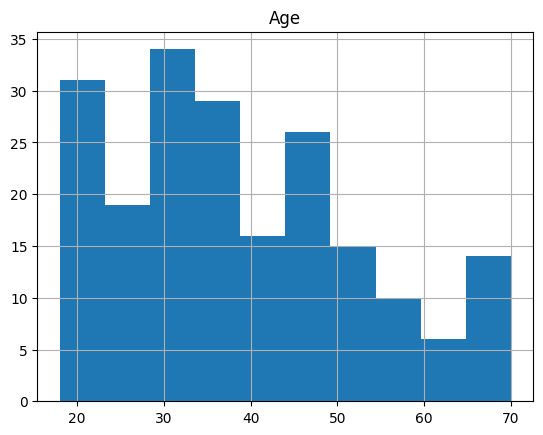

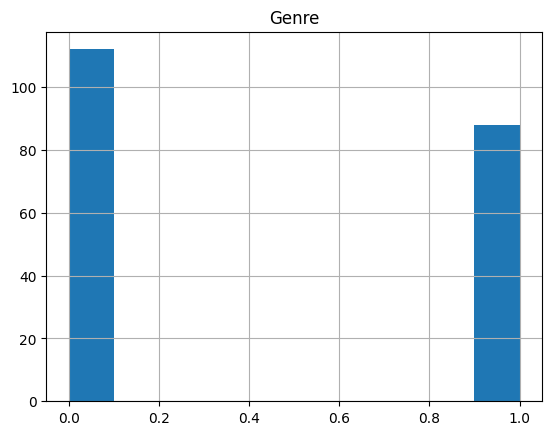

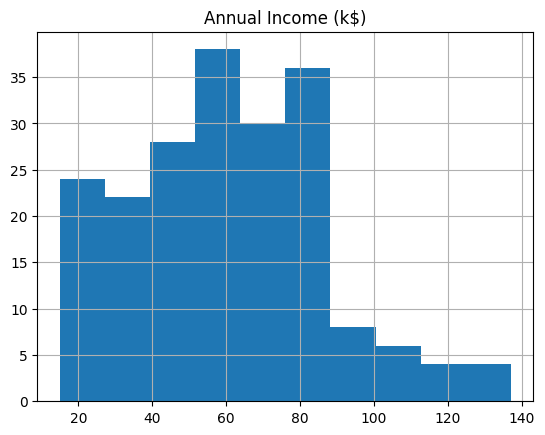

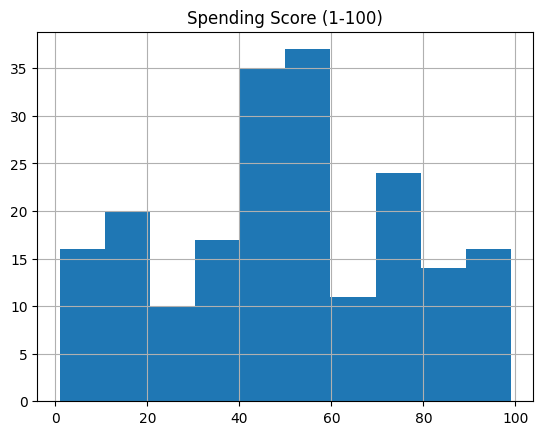

In [4]:
df.hist(column="Age")
df.hist(column="Genre")
df.hist(column="Annual Income (k$)")
df.hist(column="Spending Score (1-100)")
#df.describe()

In [5]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

Spending Score (1-100)  Annual Income (k$)        0.009903
Annual Income (k$)      Spending Score (1-100)    0.009903
                        Age                       0.012398
Age                     Annual Income (k$)        0.012398
Spending Score (1-100)  CustomerID                0.013835
CustomerID              Spending Score (1-100)    0.013835
Age                     CustomerID                0.026763
CustomerID              Age                       0.026763
Genre                   Annual Income (k$)        0.056410
Annual Income (k$)      Genre                     0.056410
Genre                   CustomerID                0.057400
CustomerID              Genre                     0.057400
Genre                   Spending Score (1-100)    0.058109
Spending Score (1-100)  Genre                     0.058109
Genre                   Age                       0.060867
Age                     Genre                     0.060867
                        Spending Score (1-100)    0.3272

In [6]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)

    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

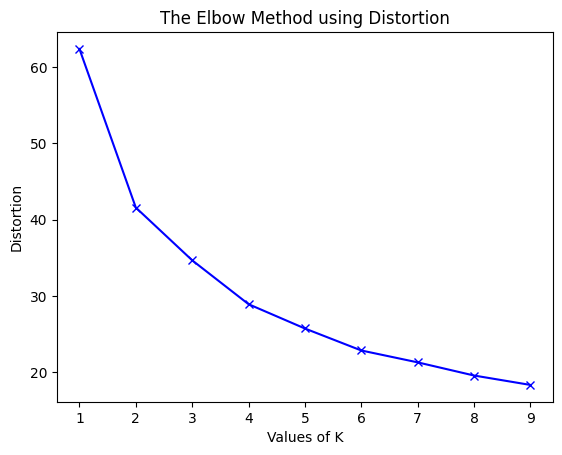

In [7]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

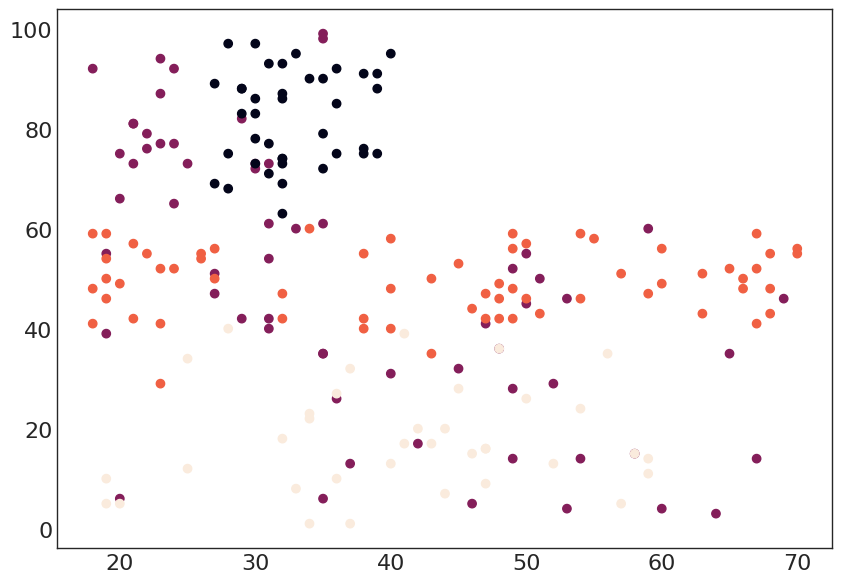

In [53]:
kmeans = KMeans(n_clusters=4, random_state=None, n_init="auto").fit(df)

#kmeans.cluster_centers_

plt.figure(figsize=(10, 7))
plt.scatter(df['Age']	,df['Spending Score (1-100)'], c=kmeans.labels_)
#с 30 до сорока расходы от 70 до 100
#c 20 до 70, от 40 до 60
# ориентироватся на людей с расходом от 40 до 60 (меньше конкуренции, меньше требований)

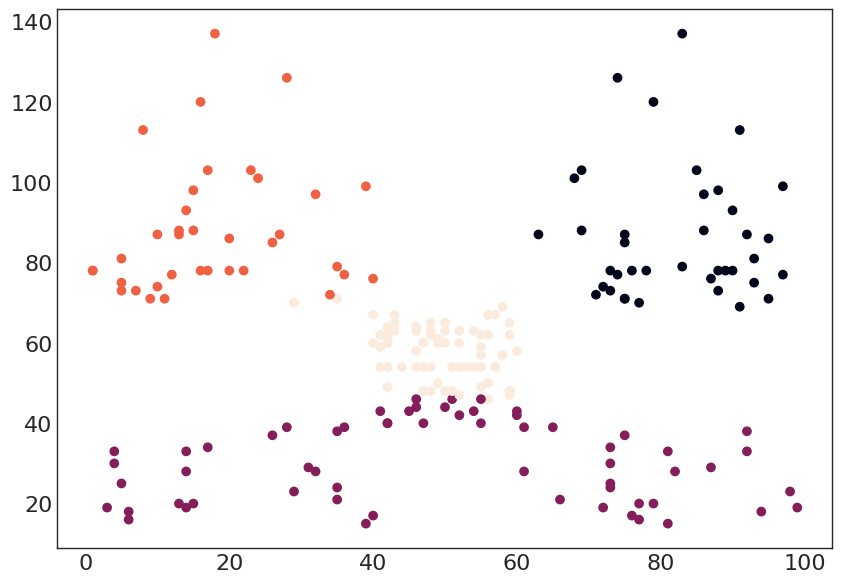

In [49]:
kmeans = KMeans(n_clusters=4, random_state=None, n_init="auto").fit(df)

#kmeans.cluster_centers_

plt.figure(figsize=(10, 7))
plt.scatter(df['Spending Score (1-100)']	,df['Annual Income (k$)'], c=kmeans.labels_)
#факторы растояния, количества, плотности

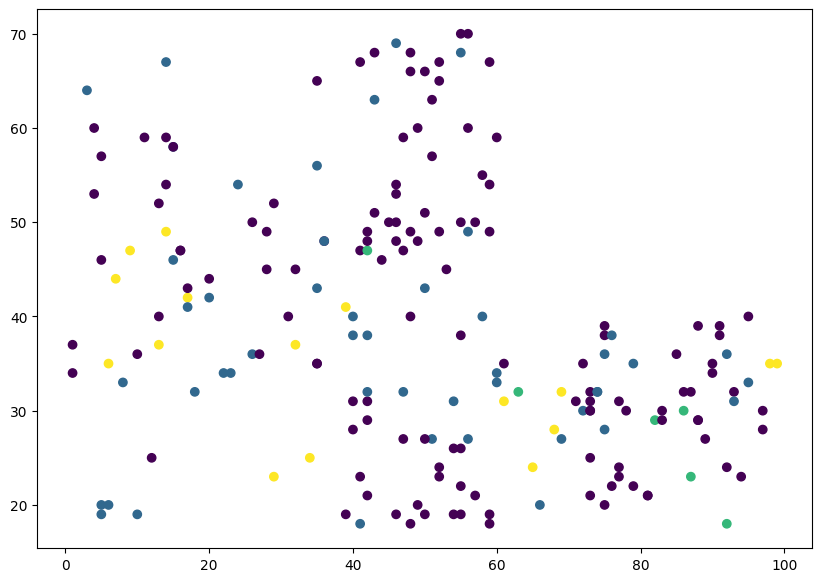

In [18]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=0).fit(df)
plt.figure(figsize=(10, 7))
plt.scatter(df['Spending Score (1-100)']	,df['Age'], c=clustering.labels_)